In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#read csv file
df=pd.read_csv("census05.csv")
df.head(12)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Cannon Street,Steven,Webster,45,Head,Single,Male,Chief Technology Officer,None,None
1,1,Cannon Street,Wayne,Perkins,39,None,Single,Male,"Therapist, horticultural",None,None
2,1,Cannon Street,Garry,O'Sullivan,43,None,Single,Male,Records manager,None,Methodist
3,1,Cannon Street,Jenna,Herbert,62,None,Single,Female,Outdoor activities/education manager,None,None
4,2,Cannon Street,Katy,Johnson,48,Head,Single,Female,"Loss adjuster, chartered",None,None
5,3,Cannon Street,Grace,Brown,45,Head,Single,Female,"Designer, ceramics/pottery",None,Christian
6,3,Cannon Street,Julie,Brown,16,Daughter,NaN,Female,Student,None,NaN
7,3,Cannon Street,Katie,Brown,14,Daughter,NaN,Female,Student,None,NaN
8,3,Cannon Street,Simon,Brown,11,Son,NaN,Male,Student,None,NaN
9,3,Cannon Street,Chelsea,Brown,11,Daughter,NaN,Female,Student,None,NaN


In [3]:
df.info()# checking the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   6000 non-null   int64 
 1   Street                         6000 non-null   object
 2   First Name                     6000 non-null   object
 3   Surname                        6000 non-null   object
 4   Age                            6000 non-null   object
 5   Relationship to Head of House  6000 non-null   object
 6   Marital Status                 4719 non-null   object
 7   Gender                         6000 non-null   object
 8   Occupation                     6000 non-null   object
 9   Infirmity                      6000 non-null   object
 10  Religion                       4681 non-null   object
dtypes: int64(1), object(10)
memory usage: 515.8+ KB


<AxesSubplot: >

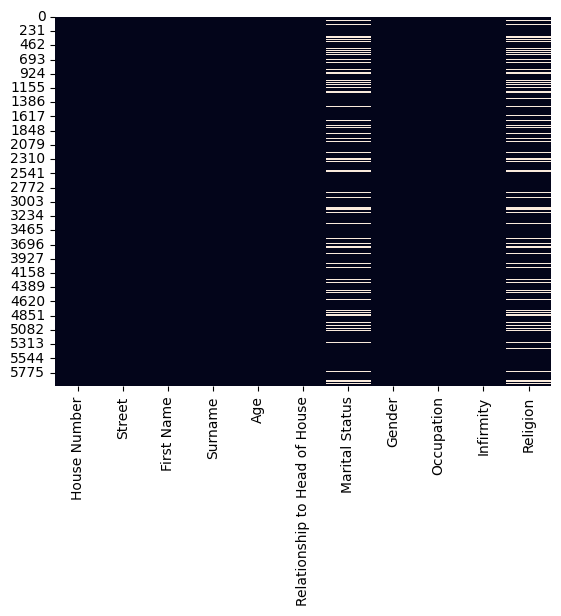

In [4]:
sns.heatmap(df.isnull(), cbar=False)# using a heatmap to show the null values among the data set.

### Data Cleaning, imputing missing values

In [5]:
df.isna().sum()# showing which entries are nulls the sum of them
# there are lot of missing value are related to 'Marital Status' and 'Religion'.

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1281
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1319
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
#house information number
df["House Number"].unique()# finding the unique entries for House Number column.

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160], dtype=int64)

In [8]:
#street information
df["Street"].unique()# finding the unique entries for Street column.

array(['Cannon Street', 'September Lake', 'Gill Heights',
       'Musictill Drive', 'Friary Spurs', 'Hereford Road', 'Ripon Port',
       'Parry Crescent', 'Marsh Lane', 'Wessex Drive', 'Dodd Street',
       'Ely Road', 'Mitchell Crossing', 'Pigeonpound Lane',
       'Violetloop Road', 'Davies Crescent', 'Price Locks',
       'Knowles Street', 'Anglia Road', 'Lichfieldcharm Drive',
       'Jones Cape', 'Gwent Lock', 'Powell Coves', 'Hall Loop',
       'Farrell Avenue', 'Jones Avenue', 'Portsmouth Rest',
       'Gibbs Crescent', 'Hopkins Crescent', 'Threpenny Road',
       'Dolphin Walks', 'Evans Hills', 'Spring Prairie', 'Farthing Burgs',
       'James Avenue', 'Middleton Prairie', 'Hove Crescent',
       'Collier Squares', 'Glory Crescent', 'Smith Islands',
       'Hove Unions', 'Leisure Mall', 'Newcastle River', 'Penny Drive',
       'Chester Road', 'Gardner Crescent', 'Johnson Road',
       'Fisher Rapids', 'Knight Avenue', 'Morar Course', 'Scotland Road',
       'Powell Road', 'Har

In [9]:
df[df["Street"]==' ']#checking empty space for street

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [10]:
#checks for the top 10 most existing streets
df["Street"].value_counts().head(10)

Threpenny Road     290
Evans Hills        243
Parry Crescent     230
Jones Cape         227
Scotland Road      208
Gibbs Crescent     204
Wessex Drive       190
Williams Avenue    182
Gill Heights       155
Musictill Drive    149
Name: Street, dtype: int64

In [11]:
#checks no of occupants on each streets
df.groupby('Street')['House Number'].nunique().sort_values(ascending=False)

Street
Evans Hills         160
Jones Cape          138
Jones Avenue         79
Threpenny Road       77
Parry Crescent       60
                   ... 
Bradford Cottage      1
King Obervatory       1
Blue Granary          1
Woodward Haven        1
Young Cabin           1
Name: House Number, Length: 105, dtype: int64

In [12]:
df["First Name"].unique()

array(['Steven', 'Wayne', 'Garry', 'Jenna', 'Katy', 'Grace', 'Julie',
       'Katie', 'Simon', 'Chelsea', 'Francis', 'Megan', 'Barbara',
       'Sandra', 'Robert', 'Marc', 'Ashleigh', 'Jodie', 'Kieran',
       'Yvonne', ' ', 'Kathleen', 'Andrea', 'Anne', 'Patricia',
       'Samantha', 'Terry', 'Wendy', 'Kyle', 'Adrian', 'Lynne', 'Bernard',
       'Louise', 'Bethan', 'Darren', 'Geoffrey', 'Victor', 'Marion',
       'Eileen', 'Jacqueline', 'Alan', 'Alison', 'Connor', 'Sara', 'Beth',
       'Andrew', 'Marie', 'Joseph', 'Paula', 'Brandon', 'Jill', 'Sian',
       'Jessica', 'Mathew', 'Matthew', 'Kim', 'Nicola', 'Douglas', 'Gary',
       'Zoe', 'Derek', 'Lewis', 'Karen', 'Margaret', 'Graeme', 'Heather',
       'Rhys', 'Lauren', 'Katherine', 'Sam', 'Hayley', 'Stacey', 'Fiona',
       'Conor', 'Samuel', 'Carl', 'Valerie', 'Christine', 'Lesley',
       'Sheila', 'Duncan', 'Denise', 'Maria', 'Ben', 'Gerald', 'Laura',
       'Olivia', 'Tom', 'Clive', 'Bethany', 'Allan', 'Dorothy', 'Callum',
     

In [13]:
df[df['First Name']==' ']# checking the empty entry for first name

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
20,7,Cannon Street,,Cross,34,Head,Single,Male,Speech and language therapist,None,Christian


In [15]:
#Blank in ‘First Name’ was replaced with ‘Missing’ as it is not possible to infer like the surname. 
df['First Name'] = df['First Name'].str.replace(" ", "Missing", regex=False)#replacing the space with missing

In [16]:
#surname information
df["Surname"].unique()# finding the unique entries for Surname column.

array(['Webster', 'Perkins', "O'Sullivan", 'Herbert', 'Johnson', 'Brown',
       'Jones', 'Grant', 'Randall', 'Bird', 'Smith', 'Perry', 'Roberts',
       'Cross', 'Carroll', 'Bradshaw', 'Myers', 'Clark', 'Graham',
       'Powell', 'Murphy', 'Davies', 'Reid', 'Taylor', 'Kennedy',
       'Charlton', 'Wilkinson', 'Davison', 'Kaur', 'Dunn', 'Lewis',
       'Parkes-Yates', 'Norton', 'Watkins', 'Warren', 'Hughes-Warren',
       'Parker', 'Cunningham', 'Turner', 'Kirk', 'Ali', 'Jackson', 'Cox',
       'Bennett', 'Porter', 'Clarke', 'Hughes', 'Campbell', 'Baker',
       'Hudson', 'Hartley', 'Walters', 'Hutchinson', 'Pearson', 'Fuller',
       'Willis', 'Walton', 'Bailey', 'Baldwin', 'Evans', 'Barker', 'Dale',
       'Harrison', 'Browne', 'Khan', 'Edwards', 'Jarvis', 'Parker-Jarvis',
       'Green', 'Watts', 'Young', 'Coleman', 'McCarthy', 'Nolan', 'Sharp',
       'Hussain', 'Fowler', 'Wilson', 'Holmes', 'Elliott', 'Sanders',
       'Lawrence', 'Boyle', 'Kemp', 'Page', 'Howell', 'Higgins',
    

In [17]:
df[df["Surname"]==' ']#checking empty space for surname

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### Age Information and Cleaning it

In [18]:
df['Age'].unique()

array(['45', '39', '43', '62', '48', '16', '14', '11', '18', '19', '52',
       '51', '24', '9', '58', '59', '1', '34', '25', '42', '6', '2', '67',
       '65', '36', '28', '22', '40', '47', '3', '20', '26', '38', '0',
       '21', '54', '95', '97', '10', '49', '30', '4', '37', '57', '27',
       '41', '56', '60', '23', '64', '44', '13', '55', '8', '35', '74',
       '78', '63', '31', '61', '7', '72', '46', '29', '32', '15', '53',
       '76', '5', '88', '50', '33', '77', '17', '79', '70', '80', '68',
       '85', '84', '75', '83', '82', '12', '86', '92', '73', '66', '71',
       '69', '89', '90', '87', '56.71875036', ' ', '102', '96', '98',
       '99', '93', '81', '94', '67.66437864', '75.34659211',
       '78.51677643', '100', '105', '50.11379719', '103', '101', '104'],
      dtype=object)

In [19]:
df[df['Age']==' ']# checking empty entry for age

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
999,4,Dodd Street,Marilyn,Bradley,,Head,Married,Female,Dealer,None,None


In [20]:
# maching people's surname with same address to replace the empty entry for age
df[df['Surname'] == 'Bradley'] [df['Street'] == 'Dodd Street']
df['Age'] = df['Age'].replace(" ", "56")

C:\Users\HP\AppData\Local\Temp\ipykernel_34424\520986945.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Surname'] == 'Bradley'] [df['Street'] == 'Dodd Street']


In [21]:
df['Age'] = [float(i) for i in df['Age']] #changing the type to float
df['Age'] = [int(i) for i in df['Age']]# changing the type to integer
df['Age'].unique()

array([ 45,  39,  43,  62,  48,  16,  14,  11,  18,  19,  52,  51,  24,
         9,  58,  59,   1,  34,  25,  42,   6,   2,  67,  65,  36,  28,
        22,  40,  47,   3,  20,  26,  38,   0,  21,  54,  95,  97,  10,
        49,  30,   4,  37,  57,  27,  41,  56,  60,  23,  64,  44,  13,
        55,   8,  35,  74,  78,  63,  31,  61,   7,  72,  46,  29,  32,
        15,  53,  76,   5,  88,  50,  33,  77,  17,  79,  70,  80,  68,
        85,  84,  75,  83,  82,  12,  86,  92,  73,  66,  71,  69,  89,
        90,  87, 102,  96,  98,  99,  93,  81,  94, 100, 105, 103, 101,
       104], dtype=int64)

### CLEANING THE MARITAL STATUS/AGE
I replaced the missing values for minors under 16 with ‘Not Applicable’ since their marital status is not relevant as they are not legally able to marry.  I replaced the missing values for individuals over 16 with ‘Missing’ as it is true that under the (Marriage Act, 1949), it is possible to marry with parental consent. Therefore , I replaced the values with ‘Missing’ to indicate the information is not available, rather than assuming that they are unmarried.  

In [22]:
unique_Marital_Status= df['Marital Status'].unique()#checking the unique values for the marital status
unique_Marital_Status

array(['Single', nan, 'Divorced', 'Married', 'Widowed'], dtype=object)

In [23]:
#checking for NA values for ages under 16
df.loc[(df["Marital Status"].isna()) & (df["Age"] <16)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,3,Cannon Street,Katie,Brown,14,Daughter,NaN,Female,Student,None,NaN
8,3,Cannon Street,Simon,Brown,11,Son,NaN,Male,Student,None,NaN
9,3,Cannon Street,Chelsea,Brown,11,Daughter,NaN,Female,Student,None,NaN
16,5,Cannon Street,Ashleigh,Bird,9,Daughter,NaN,Female,Student,None,NaN
19,6,Cannon Street,Yvonne,Roberts,1,Granddaughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5980,1,Hereford Ranch,Steven,Lee,11,Son,NaN,Male,Student,None,NaN
5981,1,Hereford Ranch,Shane,Lee,10,Son,NaN,Male,Student,None,NaN
5982,1,Hereford Ranch,Hollie,Lee,6,Daughter,NaN,Female,Student,None,NaN
5997,1,Guinevere Cottage,Tony,Payne,2,Son,NaN,Male,Child,None,NaN


In [24]:
#checking for NA values for ages over 16
df.loc[(df["Marital Status"].isna()) & (df["Age"] >=16)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6,3,Cannon Street,Julie,Brown,16,Daughter,NaN,Female,Student,None,NaN
57,2,Gill Heights,Matthew,Dunn,16,Son,NaN,Male,Student,None,NaN
187,52,Gill Heights,Anne,Green,17,Daughter,NaN,Female,Student,None,NaN
256,24,Musictill Drive,Philip,Williams,16,Son,NaN,Male,Student,None,NaN
282,32,Musictill Drive,Ryan,Saunders,16,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5845,24,Davidson Crescent,Ashleigh,Walsh,17,Granddaughter,NaN,Female,Student,None,NaN
5888,15,Fisher Lane,Yvonne,Bird,17,Daughter,NaN,Female,Student,None,NaN
5894,20,Fisher Lane,Nathan,Atkins,16,Nephew,NaN,Male,Student,None,NaN
5919,1,Davies Cottage,Joan,Brooks,16,Daughter,NaN,Female,Student,None,NaN


In [25]:
#this was replaced with Not applicable
df.loc[(df["Marital Status"].isna()) & (df["Age"] <16), :].fillna(value={'Marital Status':'Not Applicable'})

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,3,Cannon Street,Katie,Brown,14,Daughter,Not Applicable,Female,Student,None,NaN
8,3,Cannon Street,Simon,Brown,11,Son,Not Applicable,Male,Student,None,NaN
9,3,Cannon Street,Chelsea,Brown,11,Daughter,Not Applicable,Female,Student,None,NaN
16,5,Cannon Street,Ashleigh,Bird,9,Daughter,Not Applicable,Female,Student,None,NaN
19,6,Cannon Street,Yvonne,Roberts,1,Granddaughter,Not Applicable,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5980,1,Hereford Ranch,Steven,Lee,11,Son,Not Applicable,Male,Student,None,NaN
5981,1,Hereford Ranch,Shane,Lee,10,Son,Not Applicable,Male,Student,None,NaN
5982,1,Hereford Ranch,Hollie,Lee,6,Daughter,Not Applicable,Female,Student,None,NaN
5997,1,Guinevere Cottage,Tony,Payne,2,Son,Not Applicable,Male,Child,None,NaN


In [26]:
#this was replaced with NA because it is possible to be married above 16 with parental consent
df.loc[(df["Marital Status"].isna()) & (df["Age"] >=16), :].fillna(value={'Marital Status':'Missing'}) 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6,3,Cannon Street,Julie,Brown,16,Daughter,Missing,Female,Student,None,NaN
57,2,Gill Heights,Matthew,Dunn,16,Son,Missing,Male,Student,None,NaN
187,52,Gill Heights,Anne,Green,17,Daughter,Missing,Female,Student,None,NaN
256,24,Musictill Drive,Philip,Williams,16,Son,Missing,Male,Student,None,NaN
282,32,Musictill Drive,Ryan,Saunders,16,Son,Missing,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5845,24,Davidson Crescent,Ashleigh,Walsh,17,Granddaughter,Missing,Female,Student,None,NaN
5888,15,Fisher Lane,Yvonne,Bird,17,Daughter,Missing,Female,Student,None,NaN
5894,20,Fisher Lane,Nathan,Atkins,16,Nephew,Missing,Male,Student,None,NaN
5919,1,Davies Cottage,Joan,Brooks,16,Daughter,Missing,Female,Student,None,NaN


### HANDLING OUTLIERS FOR MARITAL STATUS
By visualizing the outliers in the marital status by the ages and according to the genders, it identified widows at a very young age as outliers especially male and this also showed that some were married and divorced at the age of 18 which is not inappropriate.

<AxesSubplot: xlabel='Age', ylabel='Marital Status'>

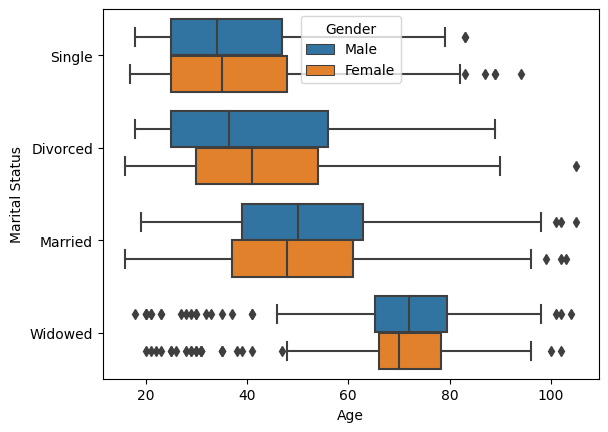

In [27]:
sns.boxplot(y=df["Marital Status"], x=df["Age"], hue=df['Gender'])

### HANDLING OUTLIERS FOR AGE
An outlier is a data point that differs significantly from otherobservations. Outliers could be as result error during data gathering Outliers were identified by using Z-score and boxplot Detecting outliers using the Z-scores Criteria: any data point whose Z-score falls out of 3rd standard deviation is an outlier. loop through all the data points and compute the Z-score using the formula (Xi-mean)/std. define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers. (https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/) For the age i defined a threshold value of 3 and mark the datapointys whose absolute value of Z- score is greater than the threshold as outliers and this means that any value presented by Z score below 3 and is also above 3 is identified as an outlier.People with ages over 100 like 102,103,104,105 where identified as outlier but these ages seems to be correct due to thorough review of their occupation column (Retired) and relationship to head of house column.

In [28]:
df[["Age"]].describe()

,Age
count,6000.000000
mean,36.802667
std,21.722002
min,0.000000
25%,19.000000
50%,35.000000
75%,52.000000
max,105.000000


In [29]:
# using Z score to identify outliers in the Age Colunm
Mean=df['Age'].mean()
Std=df['Age'].std()
threshold = 3
outlier = [] 
for i in df['Age']: 
    z = (i-Mean)/Std 
    if z > threshold: 
        outlier.append(i) 
print('Outlier for the Ages are', outlier) 

Outlier for the Ages are [102, 102, 102, 105, 105, 102, 103, 104]


### RELATIONSHIP TO BE HEAD OF HOUSE AND CLEANING IT

### Relationship to head of house
There are three households where the head of family is either 16 or 17 years old, and each household has a child. 
One household is a 16-year-old who is divorced with a child, another household is a 17-year-old who is single with a child, and the third household is a 16-year-old who is married with a child. Based on this information it is likely that they are responsible for the household and family members.
For the 16-year-old who is married with a child. It is legally possible for individuals who are 16 years old or older to marry with parental consent, as outlined in the marriage act, 1949. Therefore it is possible that the 16 year old who is married may have obtained parental consent to marry her 19-year-old husband. It is important to ensure that individuals who marry at a young age have access to the resources and support they need , including education, health care and legal services.
For the 16-year-old who is divorced with a child, it is important to ensure that the welfare of the minor and the child are being properly taken care of.
For the 17-year-old who is single with a child, similar steps should be taken to ensure that minor and the child receive the necessary support and resources. This could include assistance with childcare, education and other basic needs.
In one instance, ‘Niece’ was mistakenly spelt as 'Neice'. This was replaced with 'Niece'.



In [30]:
#Relationship to head of house
# checking for ages under 18 that are head of the family
df[(df['Age'] < 18) & (df['Relationship to Head of House'] == 'Head')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3490,2,Johnson Road,Molly,Smith,17,Head,Single,Female,Unemployed,None,NaN
3917,20,Powell Road,Debra,Turnbull,16,Head,Divorced,Female,Student,None,NaN
5384,18,Hall Creek,Carolyn,Robinson,16,Head,Married,Female,Student,None,NaN


In [31]:
##'Niece’ was mistakenly spelt as ‘Niece’. This was replaced with ‘Niece.’
df["Relationship to Head of House"] = df["Relationship to Head of House"].replace("Neice",'Niece')

In [32]:
df['Relationship to Head of House'].unique()

array(['Head', 'None', 'Daughter', 'Son', 'Partner', 'Husband',
       'Granddaughter', 'Lodger', 'Wife', 'Sibling', 'Visitor', 'Cousin',
       'Grandson', 'Step-Son', 'Niece', 'Nephew', 'Step-Daughter',
       'Adopted Son', 'Adopted Daughter', 'Son-in-law'], dtype=object)

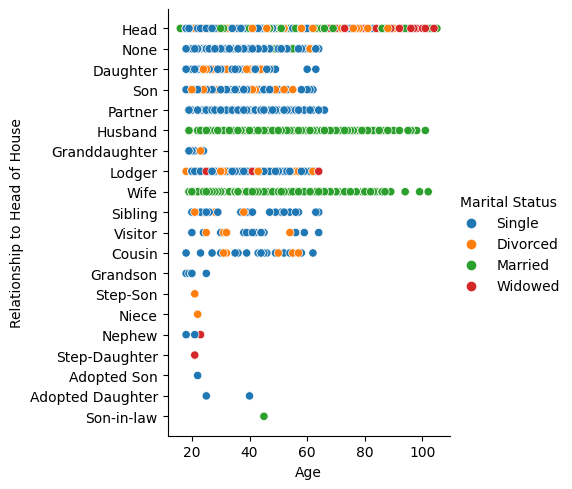

In [65]:
#relationship to head of house against age by considering the marital status
plot1 = sns.relplot(data=df, x='Age', y='Relationship to Head of House',hue='Marital Status')

### OCCUPATION INFORMATION AND CLEANING IT

### The two blanks in the occupation column were replaced with ‘Missing’ as the occupation status of these individuals is unknown. 

In [33]:
df[df['Occupation']==' ']#checking if there is any space value in occupation column

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2943,15,Middleton Prairie,Jenna,Burton,35,Head,Married,Female,,None,Christian
3031,7,Collier Squares,Brandon,Blackburn,34,Husband,Married,Male,,None,None


In [34]:
df['Occupation'] = df['Occupation'].replace(" ", "Missing")# blanks replaced with missing because the occupation is unknown

In [35]:
# replacing individuals who are over 65 that are unemployed to retired
df.loc[(df['Occupation'] == 'Unemployed') & (df['Age'] >= 65)].replace('Unemployed','Retired')

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
659,39,Parry Crescent,Marian,Hurst,83,Head,Widowed,Female,Retired,None,Methodist
728,54,Parry Crescent,Francesca,Sullivan,67,Head,Widowed,Female,Retired,None,Christian
1089,5,Pigeonpound Lane,Chelsea,Walker,68,Head,Divorced,Female,Retired,None,None
1250,9,Price Locks,Stanley,Green,66,Husband,Married,Male,Retired,None,None
1328,2,Lichfieldcharm Drive,Reece,Hamilton,65,Husband,Married,Male,Retired,None,Christian
1461,75,Jones Cape,Tom,Wheeler,75,Head,Widowed,Male,Retired,None,Christian
1553,133,Jones Cape,Lee,Webb,76,Head,Widowed,Male,Retired,None,Christian
1621,3,Powell Coves,Kate,Page,71,Head,Widowed,Female,Retired,None,Christian
1688,2,Hall Loop,Shirley,Kelly,65,Head,Divorced,Female,Retired,None,Catholic
1846,60,Jones Avenue,Damian,Nicholls,67,Head,Single,Male,Retired,None,Catholic


In [36]:
df['Occupation'].unique()

array(['Chief Technology Officer', 'Therapist, horticultural',
       'Records manager', ...,
       'Retired Scientist, product/process development',
       'Retired Designer, jewellery',
       'Retired Lecturer, higher education'], dtype=object)

### INFIRMITY AND CLEANING IT

In [37]:
df['Infirmity'].unique()

array(['None', ' ', 'Mental Disability', 'Physical Disability', 'Blind',
       'Deaf', 'Unknown Infection', 'Disabled'], dtype=object)

In [38]:
df[df['Infirmity']==' ']#checking empty entries for infirmity

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10,4,Cannon Street,Francis,Jones,18,Head,Single,Male,University Student,,Catholic
2354,35,Threpenny Road,Owen,Greenwood,14,Son,NaN,Male,Student,,NaN
2537,8,Dolphin Walks,Jill,Bennett,24,Daughter,Single,Female,Charity fundraiser,,None
2719,104,Evans Hills,Amanda,Rhodes,49,Head,Married,Female,Data scientist,,Catholic
3391,4,Gardner Crescent,Suzanne,Haynes,26,Daughter,Single,Female,Environmental education officer,,None
4285,23,Williams Avenue,Philip,Wilson,22,None,Single,Male,Patent attorney,,None
4351,5,Hawkins Road,Ryan,Roberts-Wilkinson,27,Son,Divorced,Male,Unemployed,,None
5779,2,Skinner Road,Kathleen,Fletcher,14,Daughter,NaN,Female,Student,,NaN
5978,1,Hereford Ranch,Molly,Lee,18,Daughter,Single,Female,Student,,None


In [39]:
df['Infirmity'] = df['Infirmity'].replace(" ", "NA")#replacing all empty entries with Not Available

In [40]:
df['Infirmity'].unique()

array(['None', 'NA', 'Mental Disability', 'Physical Disability', 'Blind',
       'Deaf', 'Unknown Infection', 'Disabled'], dtype=object)

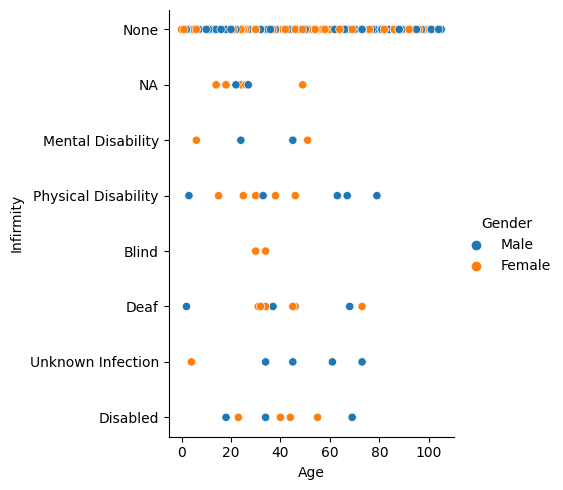

In [41]:
plot2 = sns.relplot(data=df, x='Age', y='Infirmity',hue='Gender')

### RELIGION INFORMATION AND CLEANING IT

### Religion, dealing with missing values
The missing value in Religion for minors was replaced with their parent's religion because in most cases a child grows to practice the religion of their parent. So I imputed the minors religion to that of the previous respondent after them which is their parent/guidance religion. Two respondence gave their religion as ‘Private’. This religion remained private as ‘Private’ refers to a legitimate religion that the respondent chose not to disclose. It is important to respect the privacy of the respondent and not assume that their choice to keep their religion private means they are not part of a legitimate religion. The blanks were replaced with NA (Not Available).


In [42]:
df['Religion'].unique()

array(['None', 'Methodist', 'Christian', nan, 'Catholic', 'Muslim',
       'Jewish', 'Sikh', ' ', 'Orthodoxy', 'Baptist', 'Bahai', 'Private'],
      dtype=object)

In [43]:
df[df['Religion']==' ']#checking empty entries for Religion

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
699,46,Parry Crescent,Teresa,Howell,42,None,Single,Female,Structural engineer,None,
2715,101,Evans Hills,Jacqueline,Hancock,73,Head,Divorced,Female,Retired Meteorologist,None,
3467,32,Gardner Crescent,Christian,Bennett,26,None,Single,Male,Archivist,None,
5683,3,Earlram Lane,Lindsey,Miah,25,Head,Married,Female,Biomedical scientist,None,


In [44]:
# imputation of missing data
df['Religion'].replace(['Cath0lic'],['Christian'], inplace = True)
df['Religion'].replace(['Orthodoxy'],['Christian'], inplace = True)
df['Religion'].replace(['Baptist'],['Christian'], inplace = True)
df['Religion'].replace([''],['None'], inplace = True)
df['Religion'].replace([" "], ["NaN"], inplace = True)
### i imputed the minors religion to that of the previous respondent after them(using time series) 
df['Religion'].fillna(method='ffill',inplace=True)
print(df['Religion'].value_counts())

None         2794
Christian    1698
Catholic      823
Methodist     514
Muslim        104
Sikh           36
Jewish         24
NaN             4
Private         2
Bahai           1
Name: Religion, dtype: int64


In [46]:
df['Religion'].unique()

array(['None', 'Methodist', 'Christian', 'Catholic', 'Muslim', 'Jewish',
       'Sikh', 'NaN', 'Bahai', 'Private'], dtype=object)

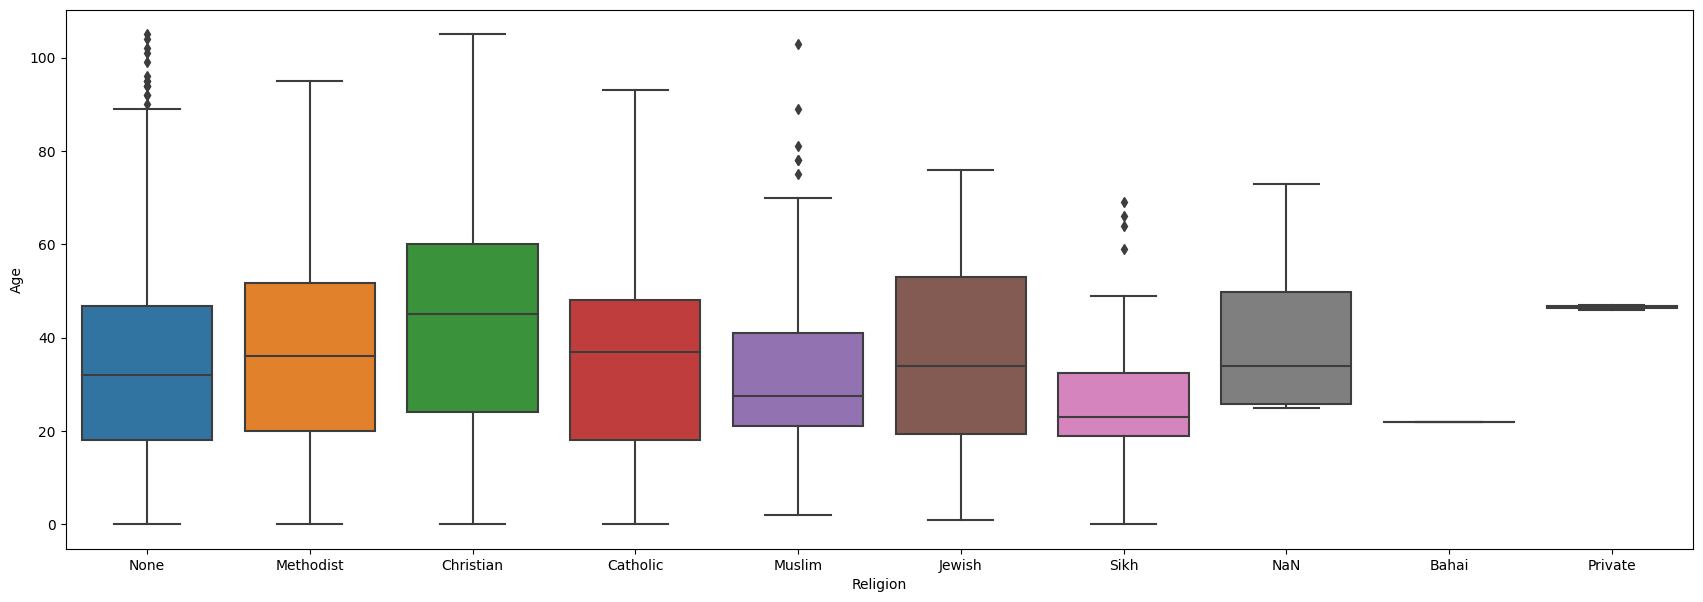

In [47]:
plt.figure(figsize=(21,7))
sns.boxplot(x=df["Religion"], y=df["Age"])
plt.show()

### DATA ANALYSIS AND VISUALIZATION

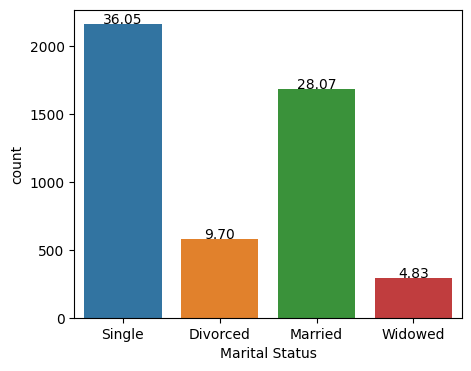

In [48]:
#USING COUNTPLOT TO VISUALIZE MARITAL STATUS
plt.figure(figsize=(5,4))
td = float(len(df) )

ax = sns.countplot(x="Marital Status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}'.format((height/td)*100),
            ha="center") 
plt.show()


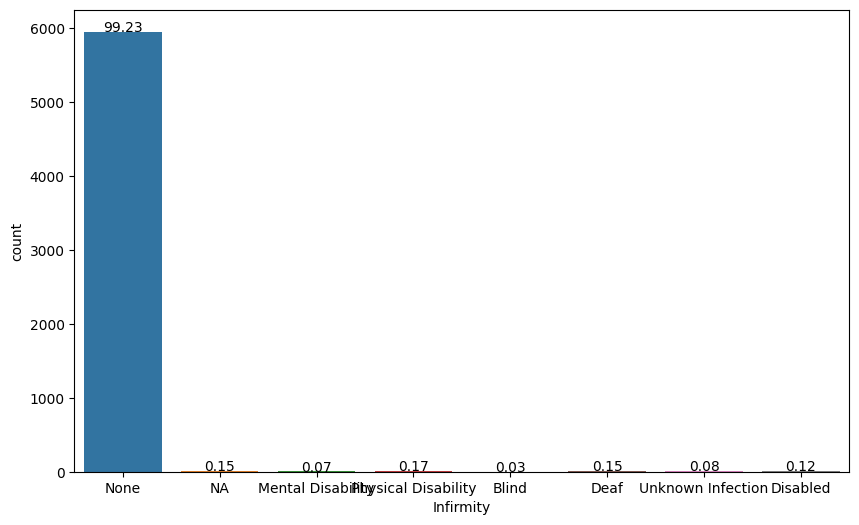

In [49]:
#Using countplot to visualize infirmity
plt.figure(figsize=(10,6))
td = float(len(df) )

ax = sns.countplot(x="Infirmity", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}'.format((height/td)*100),
            ha="center") 
plt.show()


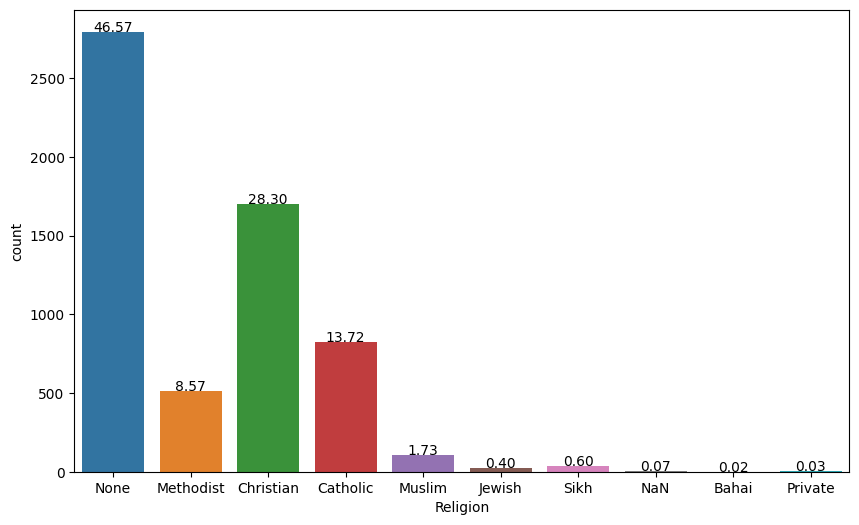

In [50]:
#Using countplot to visualize Religion
plt.figure(figsize=(10,6))
td = float(len(df) )

ax = sns.countplot(x="Religion", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}'.format((height/td)*100),
            ha="center") 
plt.show()

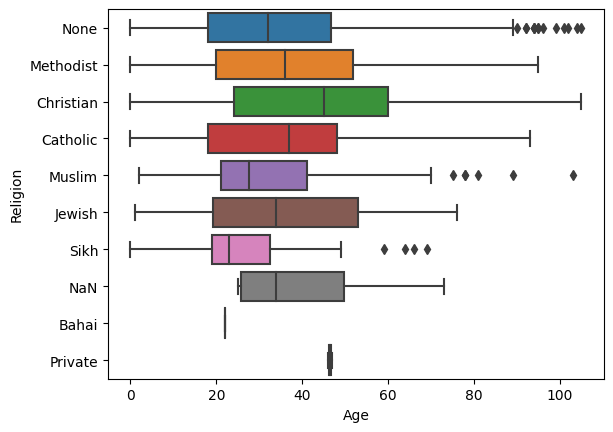

In [51]:
#using boxplot to show the relationship betwwen age and religion
sns.boxplot(data=df,x='Age',y = 'Religion')
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Marital Status'>

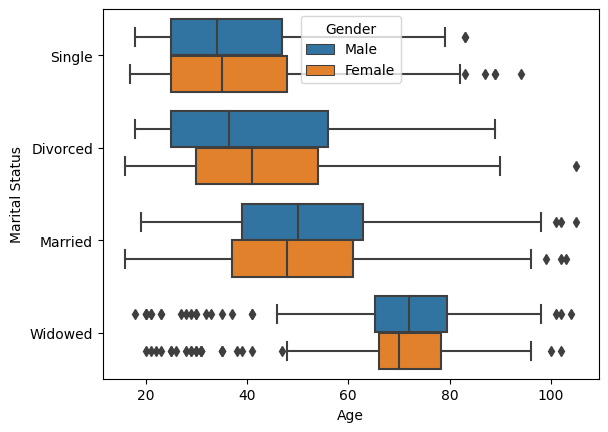

In [52]:
#Using boxplot to show the relationship between Marital Status,Age and Gender
sns.boxplot(y=df["Marital Status"], x=df["Age"], hue=df['Gender'])

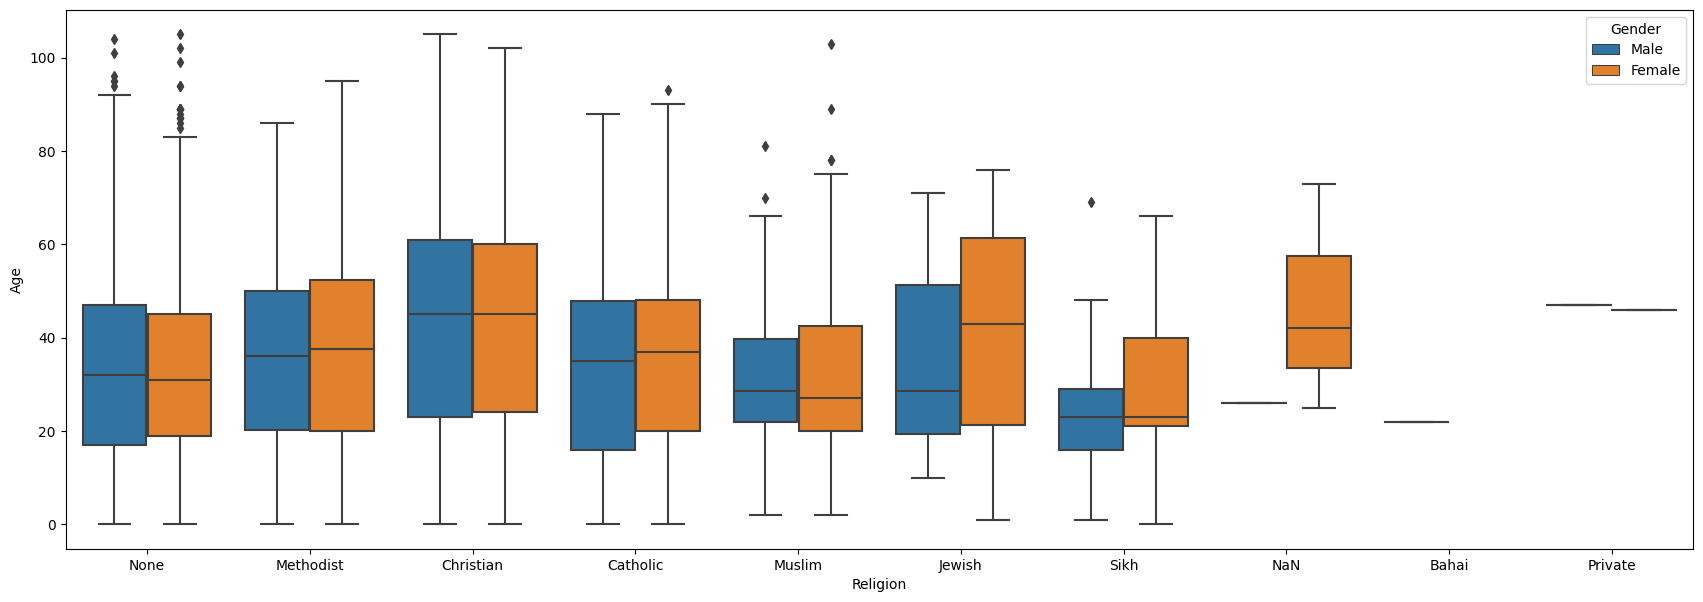

In [54]:
#Using boxplot to show the relationship between Religion,Age and Gender
plt.figure(figsize=(21,7))
sns.boxplot(x=df["Religion"], y=df["Age"], hue=df['Gender'])
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Infirmity'>

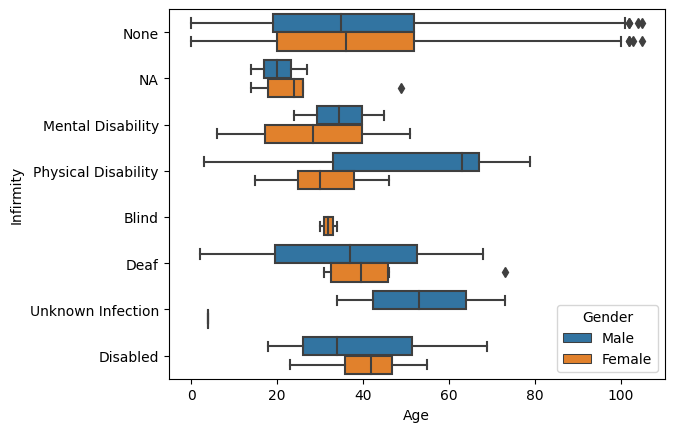

In [56]:
#Using boxplot to show the relationship between Infirmity,Age and Gender
sns.boxplot(y=df["Infirmity"], x=df["Age"], hue=df['Gender'])

### POPULATION PYRAMID

In [58]:
age_intervals = []
male_count = []
female_count = []
next_start = 0
for i in range(0,110,5):
    interval = f'{next_start}- {next_start+4}'
    next_start = next_start +4+1
    age_intervals.append(interval)
    male_count.append(0)
    female_count.append(0)
    
    
   
print(female_count)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [59]:
print(male_count)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [60]:
print(age_intervals)

['0- 4', '5- 9', '10- 14', '15- 19', '20- 24', '25- 29', '30- 34', '35- 39', '40- 44', '45- 49', '50- 54', '55- 59', '60- 64', '65- 69', '70- 74', '75- 79', '80- 84', '85- 89', '90- 94', '95- 99', '100- 104', '105- 109']


[Text(0.5, 0, 'Population Count'), Text(0, 0.5, 'Age Group')]

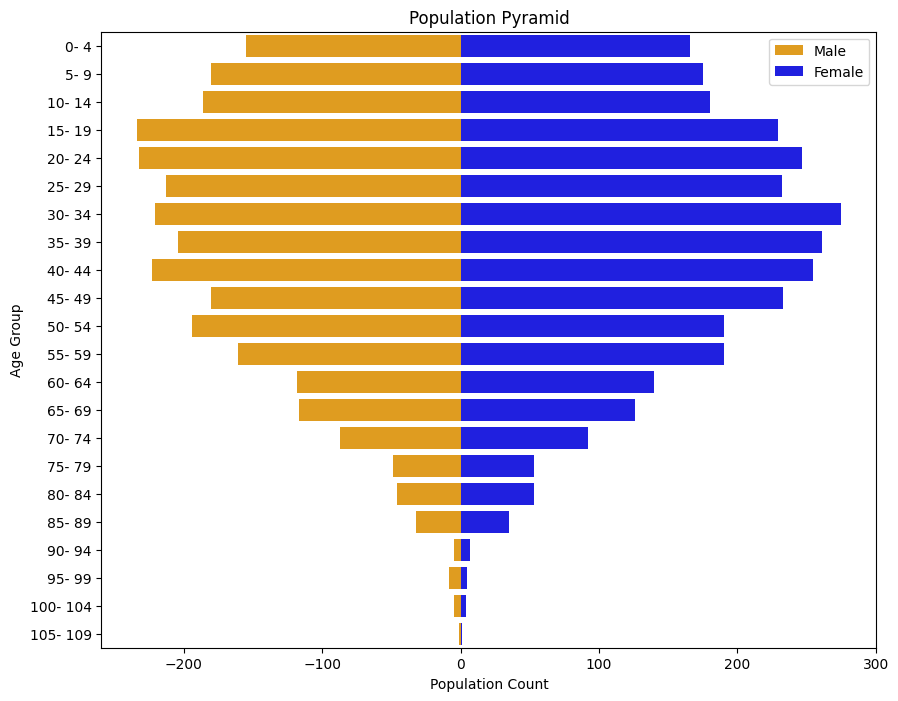

In [61]:
def get_age_group(age):
    index= int(age/5)
    return age_intervals[index]
df['age_group']= df['Age'].apply(get_age_group)
male_df_ages =df[df['Gender']== 'Male']['Age'].to_list()
for age in male_df_ages:
    index= int(age/5)
    male_count[index]=male_count[index]+1
female_df_ages =df[df['Gender']== 'Female']['Age'].to_list()
for age in female_df_ages:
    index= int(age/5)
    female_count[index]=female_count[index]+1
unemployed_df_age = df[df['Occupation']== 'Unemployed']['Age'].to_list()
age_pyramid_df=pd.DataFrame({'Female':female_count,'Male':[-1*val for val in male_count],'Age':age_intervals,})
plt.figure(figsize=(10,8))
age_pyramid=sns.barplot(x='Male',y='Age',data=age_pyramid_df,order=age_intervals,color=('Orange'),label='Male')
age_pyramid=sns.barplot(x='Female',y='Age',data=age_pyramid_df,order=age_intervals,color=('Blue'),label='Female')
age_pyramid.legend()
plt.title('Population Pyramid')
age_pyramid.set(xlabel = 'Population Count',ylabel= 'Age Group')

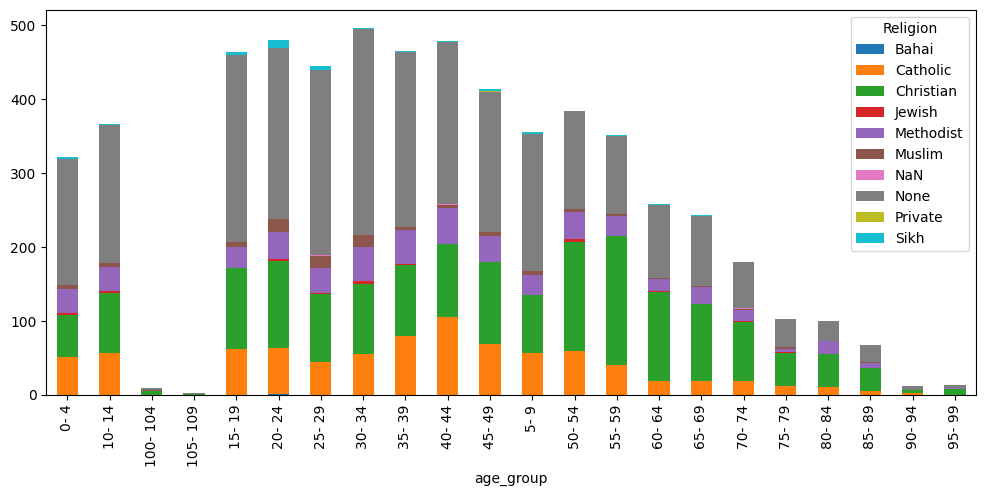

In [62]:
#Using crosstab to visualize Age Group and Religion
dd = pd.crosstab(df['age_group'],df['Religion'])
dd.plot.bar(stacked=True,figsize=(12,5))
plt.xticks(rotation = 90)
plt.show()

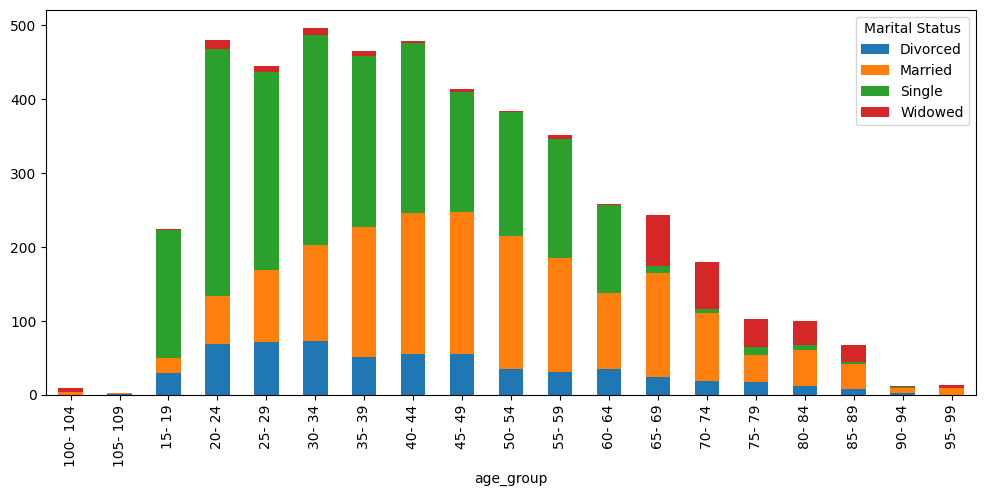

In [63]:
#Using crosstab to visualize Age Group and Marital Status
dd = pd.crosstab(df['age_group'],df['Marital Status'])
dd.plot.bar(stacked=True,figsize=(12,5))
plt.xticks(rotation = 90)
plt.show()

### OCCUPATION STATUS
The occupation categories were also subdivided into main categories of Employed, Retired, Unemployed, Student, University student, child. 

employed              0.546667
Student               0.173167
Retired               0.092333
University Student    0.072167
Unemployed            0.062167
Child                 0.053500
Name: Occupation_Group, dtype: float64

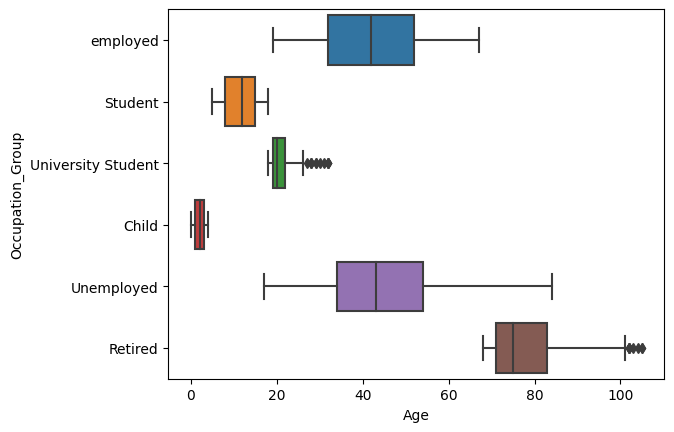

In [66]:
# Defining occupation status by categorising the employment status.

# creating an empty list for occupation status.
occ = []

# Using the for loop to separate the occupation status of each group.
for i in df['Occupation']:
    if i == 'University Student':
        occ.append('University Student')
    elif i == 'Student':
        occ.append('Student')
    elif i == 'Child':
        occ.append('Child')
    elif 'Retired' in i:
        occ.append('Retired')
    elif 'PhD' in i:
        occ.append('University Student')
    elif i =='Unemployed':
        occ.append('Unemployed')        
    else:
        occ.append('employed')

df['Occupation_Group']=occ

#showing the occupation status of each group by a boxplot.
sns.boxplot( x=df["Age"], y=df["Occupation_Group"] ) 
ocs = df["Occupation_Group"]

#showing the distribution of each group in occupational status.
ocs.value_counts()/ocs.count()

### BIRTH RATE
From the analysis, the current crude birth rate of a town is 8.67 births per thousand, which implies that 8.67 babies are born per year for every 1,000 people in the town. To calculate the total number of births in the town, we can divide the total number of births in one year by the town's population and then multiply the result by 1000.
 
Furthermore, four years ago, the birth rate per 1000 was estimated to be 11.83 after adjusting for the population in the previous year. This indicates that in the past four years, there has been a decline of 3.16 births per thousand in the town's birth rate.
This decline in birth rate may be attributed to various factors, including women focusing more on their education and careers, medical advancements such as lower child mortality, and access to contraception. The data also suggests that the town's population growth has slowed down due to the declining birth rate.
In summary, the current birth rate of 8.67 births per thousand in the town implies that the population is not growing, and the decline in the birth rate over the last four years could be attributed to several social and medical factors that have influenced family planning decisions.


In [67]:
Population = len(df)
births_one_year = len(df[df['Age'] == 0])
Birthrate = (births_one_year/Population)*1000
Birthrate


8.666666666666666

In [68]:
age0 = df['Age'] == 0
age4= df['Age'] == 4
age8 = df['Age'] == 8

cbirthrate = (len(df[age0])/Population)*1000 

cbirthrate4 = (len(df[age4])/Population)*1000

print(f"The Birthrate per 1000 for the year is {cbirthrate}")
print(f"The Birthrate for the previous year per 1000 is {cbirthrate4}")
print(f"The difference between the previous Birthrate and the current year per 1000 is {cbirthrate-cbirthrate4}")

The Birthrate per 1000 for the year is 8.666666666666666
The Birthrate for the previous year per 1000 is 11.833333333333332
The difference between the previous Birthrate and the current year per 1000 is -3.166666666666666


### DEATH RATE
The death rate of a population can be calculated by dividing the total number of deaths in one year by the absolute population and then multiplying the result by 1000. The analysis shows that the death rate in the population is 16.5 per thousand, which indicates that 16.5 individuals per 1000 people in the population die every year.
 
The decline in the death rate can be attributed to several factors, including better healthcare, low infirmity rates, and an increase in the creation of homes. The low death rate of 16.5 also suggests that the population is aging, and there is a need to prioritize the creation of homes to accommodate the growing aging population.
The decrease in the death rate could be attributed to improved medical knowledge, increased income, and better-quality housing. These factors have contributed to better health outcomes and lower mortality rates in the population.
In conclusion, the death rate of 16.5 per thousand in the population indicates a decline in mortality, which can be attributed to various factors such as improved healthcare, low infirmity rates, and better-quality housing. However, the aging population poses new challenges, and there is a need to prioritize the creation of homes to cater to the growing aging population.


In [69]:
aging_population = df[df['Age'].between(65,113)].groupby('Age').size().sort_index(ascending=False)
ageing = aging_population.shift(-1)
net = aging_population - ageing
net = net.reset_index(name='Count')
deaths = net[net['Count'] < 0]
death_rate = abs(((deaths['Count']).sum())/Population)*1000
death_rate

16.5

### FERTILITY RATE
According to the analysis, the average number of children per woman of childbearing age in every 1000 is 226. This means that for every 1000 women of childbearing age, there is an average of 226 children born.

In [70]:
age_zero = []
for i in df.index:
    if df.at[i,'Age'] == 0:
        age_zero.append(df['Age'])
    else:
        pass
Mother2529 = []
for i in df.index:
    if df.at[i,'Age'] >=25 and df.at[i,'Age'] <=29 and df.at[i,'Gender']== 'Female' :
        Mother2529.append(df['Age'])
    else:
        pass
Mother3034 = []
for i in df.index:
    if df.at[i,'Age'] >=30 and df.at[i,'Age'] <=34 and df.at[i,'Gender']== 'Female' :
        Mother3034.append(df['Age'])
    else:
        pass
Mother3540 = []
for i in df.index:
    if df.at[i,'Age'] >=35 and df.at[i,'Age'] <=40 and df.at[i,'Gender']== 'Female' :
        Mother3540.append(df['Age'])
    else:
        pass
print(len(Mother2529))
print(len(Mother3034))
print(len(Mother3540))

232
275
310


### The average number of children per woman of child-bearing age in every 1000 
According to the analysis, the average number of children per woman of childbearing age in every 1000 is 226. This means that for every 1000 women of childbearing age, there is an average of 226 children born.

In [71]:
births_in_total = len(df[age0]) +  len(df[age4]) + len(df[age8])
potential_women = len(Mother2529)+ len(Mother3034)+len(Mother3540)
fr = births_in_total/potential_women

print(f"The average number of children per woman of child-bearing age in every 1000 is {fr*1000}")

The average number of children per woman of child-bearing age in every 1000 is 226.43818849449204


### Natural Increase Rate 
According to the data, the natural increase rate in the city is -7.83%, which is the difference between the death rate and birth rate. This indicates that the rate of birth is less than the rate of death within the year, resulting in a negative rate of natural increase. This negative trend suggests that the city is experiencing a decline in population growth.



In [ ]:
nir =Birthrate - death_rate
print(f'The natural increase rate is {nir}')

###   Marriage Rate/Divorce Rate
From the analysis, the divorce to marriage ratio is 34.56 per 1684 marriages, indicating a relatively high divorce rate. Out of the total of 1684 marriages, there were 582 divorces recorded.
To calculate the divorce rate, the number of divorcees is divided by the total number of marriages (1684) and multiplied by 100, resulting in a divorce rate of 34.56%. This figure suggests that over one-third of marriages end in divorce.
It is also noteworthy that the number of female divorcees is higher than that of male divorcees, indicating that women are more likely to initiate divorce proceedings. 


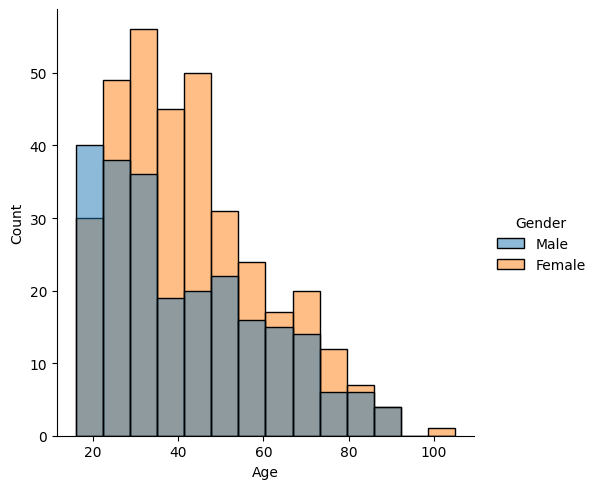

In [72]:
Divorced=df[df["Marital Status"]=='Divorced']
divorcedplot= sns.displot(data=Divorced, x='Age', hue='Gender')
divorcedplot.savefig('divorcedplot.png')

In [73]:
# calculating the number of divorced men and women.
Divorced_count=Divorced['Gender'].value_counts()
Divorced_count

Female    346
Male      236
Name: Gender, dtype: int64

In [74]:
# calculating the divorce to marriage rate
Divorce_to_Marriage_rate = round(582/ 1684 *100,2)
print(f" The divorce to marriage rate is: {Divorce_to_Marriage_rate} ")

 The divorce to marriage rate is: 34.56 


In [75]:
Married=df[df["Marital Status"]=='Married']

In [76]:
Married_count=Married['Gender'].value_counts()
Married_count

Female    845
Male      839
Name: Gender, dtype: int64

### Immigration Rate
Immigrants are individuals who move to a different country, and according to the data, there has been an increase in the age group of 15-59 years and a decrease in the age group of 25-29 years. This suggests that many students come to the town to attend university and then leave upon graduation. However, those who decide to stay may do so due to the availability of job opportunities and a low cost of living.
To calculate the immigration rate, the number of lodgers and visitors was used, resulting in 27 immigrants per thousand people in the town. This figure highlights the attractiveness of the town as a destination for individuals seeking better opportunities.


In [77]:
#calculating Immigration rate according to visitors and lodgers
lodgers = []
for i in df.index:
    if df.at[i,'Relationship to Head of House'] == 'Lodger'and df.at[i,'Marital Status']== 'Single' and df.at[i,'Marital Status']!= 'Divorced':
        lodgers.append(df['Relationship to Head of House'])
        
    
    else:
        pass
visitors = []
for i in df.index:
    if df.at[i,'Relationship to Head of House'] == 'Visitor'and df.at[i,'Marital Status']== 'Single' and df.at[i,'Marital Status']!= 'Divorced':
        visitors.append(df['Relationship to Head of House'])
        
    
    else:
        pass
Immigrant = len(lodgers)+len(visitors)
Immigration_rate = (Immigrant/Population)*1000
Immigration_rate

26.5

In [78]:
# calculating the immigration number according to visitors and lodgers.
immigration = ((df['Relationship to Head of House'] == 'Visitor' ) | (df['Relationship to Head of House' ] == 'Lodger' )) & (df['Marital Status']== 'Single')
immigration = len(df[immigration])
print(f" The immigration number is: {immigration}")

 The immigration number is: 159


### Emmigration Rate
emigration was calculated based on the difference between male and female divorcees. The data shows that there are more female divorcees than male divorcees, indicating that men are more likely to leave the town after a divorce. Based on this information, the emigration rate is estimated to be 18 per thousand people in the town.

In [79]:
# calculating emigration number according to divorced men
divorced_men = (df['Marital Status'] == 'Divorced') & (df['Gender'] == 'Male')
divorced_men = len(df[divorced_men])
D1 = divorced_men

divorced_women =  (df['Marital Status'] == 'Divorced') & (df['Gender'] == 'Female')
divorced_women = len(df[divorced_women])
D2 = divorced_women

Emigration= D2-D1
print(f" The emmigration number is: {Emigration} ")

 The emmigration number is: 110 


In [80]:
#calculating emigration rate
Emigration_rate = (Emigration/Population)*1000
Emigration_rate 

18.333333333333332

### NET MIGRATION
According to the data, the net migration rate in the city is 8.17%, which is the difference between the immigration rate and the emigration rate. This indicates that more people are coming into the city than leaving, which can help to stabilize the negative natural increase rate (birth rate - death rate).
The positive net migration rate suggests that the city is attractive to immigrants, potentially due to factors such as employment opportunities, affordable housing, and access to education and healthcare. This influx of new residents can help to offset the negative impact of the declining population growth rate, as it contributes to an increase in the overall population.


In [81]:
# calculating Net Migration according to the difference between immigration and emigration
Net_Migration = round((immigration - Emigration)/len(df)*1000 , 2)
print(f" The Net migration is: {Net_Migration}")

 The Net migration is: 8.17


### Natural Increase Rate
According to the data, the natural increase rate in the city is -7.83%, which is the difference between the death rate and birth rate. This indicates that the rate of birth is less than the rate of death within the year, resulting in a negative rate of natural increase. This negative trend suggests that the city is experiencing a decline in population growth.



In [82]:
#calculating natural increase rate
nir =Birthrate - death_rate
print(f'The natural increase rate is {nir}')

The natural increase rate is -7.833333333333334


### POPULATION GROWTH
The growth rate of a population refers to the percentage change in population size over a specific time period. It is influenced by a variety of factors such as immigration, emigration, birth rate, and death rate.
 
Based on the available data, the total population of the city has grown by 0.34% over the specified time period. This growth rate can be largely attributed to the positive net migration rate, as the declining fertility rate has resulted in a decrease in the natural increase rate.


In [84]:
#calculating the  population growth
population_growth = round(nir + Net_Migration, 2)
print(f" The population growth is : {population_growth}")

 The population growth is : 0.34


### DEPENDENCY RATIO
Dependency ratio shows no of people who are too young or too old to take care of them
themselves (under 15 and over 65). The number of dependent is 1847, number of independent is 4153, number of minor is 1121 and number of aging population is 726. This shows that the government needs to plan ahead.

In [96]:
#calculating the dependency ratio
minor = df[df['Age'].between(0,15)]
aging_population = df[df['Age'].between(65,113)]
dependent =len(minor) + len(aging_population)
independent = len(df)-dependent
dep_ratio= (dependent/independent)*100
print(dependent)
print(independent)
print(len(minor))
print(len(aging_population))
print(f'The ratio of people who are too young or too old to is {dep_ratio}')

1847
4153
1121
726
The ratio of people who are too young or too old to is 44.473874307729346


### UNEMPLOYMENT RATE
Based on the calculations, the unemployment rate in the city is 8.98%. This rate indicates the proportion of individuals who are currently not employed in relation to the total workforce. A high unemployment rate has several negative effects on the economy, including a reduction in real income for people and a decrease in the overall output of the economy.



In [92]:
#calculating the unemployed
unemployed_people =[]
for i in df.index:
    if df.at[i,'Occupation'] == 'Unemployed':
        unemployed_people.append(df['Occupation'])
        
    
    else:
        pass
        
    

len(unemployed_people)

373

In [93]:
#calculating the labour force
labour_force = Population - dependent
labour_force

4153

In [97]:
# calculating unemployment rate 
Unemployment_rate = (len(unemployed_people)/labour_force)*100
Unemployment_rate

8.981459186130508

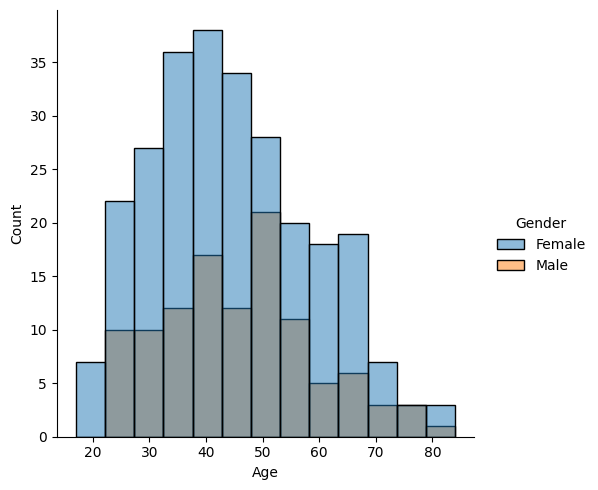

In [98]:
# showing the number of unemployed in a plot
unemployed = df[df['Occupation'] == 'Unemployed']
unemployed_gender=sns.displot(data=unemployed, x='Age', hue='Gender')

### COMMUTERS
The identification of commuters in the town was conducted using a methodology that consisted of two criteria: individuals who self-identify as University Students, including PhD students, and those who have occupations that require commuting. Occupations such as baristas, community roles, and retail workers were deemed non-commuting jobs.
Based on this approach, the study identified a total of 2256 commuters, comprising 37.6% of the entire population. This percentage is relatively high and may have implications for the transportation infrastructure and traffic patterns in the town.


In [99]:
#calculating number of employed people
student =df[df['Occupation'].str.contains('Student')]
university_student = df[df['Occupation'].str.contains('University student')]
High_school_student = []
for i in df.index:
    if df.at[i,'Age'] >=25 and df.at[i,'Age'] <=29 and df.at[i,'Gender']== 'Female' :
        Mother2529.append(df['Age'])
    else:
        pass
Employed_with_student = Population - (len(unemployed_people)+ dependent )
Employed = Employed_with_student -(len(student) + len(university_student))
Employed

2308

In [100]:
#calculating the numbers of commuters
student =df[df['Occupation'].str.contains('Student')]
university_student = df[df['Occupation'].str.contains('University student')]
retired =df[df['Occupation'].str.contains('Retir')]
baritas = df[df['Occupation'].str.contains('Barista')]
Community = df[df['Occupation'].str.contains('Community')]
retail_worker =df[df['Occupation'].str.contains('Retail')]
commuters = Employed - (len(baritas)+len(Community)+len(retail_worker))
commuters             

2256

In [101]:
#calculating percentage of commuters
percentage_commuters = (commuters/Population)*100
percentage_commuters

37.6

### OCCUPANCY
Based on the analysis conducted, the mean occupancy rate of the houses is approximately 3 (specifically 2.57). This indicates that, on average, there are about 3 individuals living in each house. However, further analysis reveals that there are approximately 959 houses that are over-occupied out of the total 2330 houses examined.
Moreover, there were cases where a single house was occupied by over 20 individuals. This is indicative of an affluent family, as it is expected that a family with such a large number of members would require a massive house to accommodate everyone comfortably.


In [102]:
#showing occupancy level in each house
occupancy = df.groupby(['House Number', 'Street']).size().reset_index(name='No of Occupant')
occupancy.median()

C:\Users\HP\AppData\Local\Temp\ipykernel_34424\548218820.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  occupancy.median()


House Number      16.0
No of Occupant     2.0
dtype: float64

In [103]:
# occupancy describe
occupancy['No of Occupant'].describe()

count    2330.000000
mean        2.575107
std         1.652685
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        20.000000
Name: No of Occupant, dtype: float64

In [104]:
#showing the number of occupied houses
over_occupied=occupancy[occupancy['No of Occupant'].between(3,20)]
len(over_occupied)

959